Columns in dataset: Index(['country', 'continent', 'year', 'life_exp', 'hdi_index', 'co2_consump',
       'gdp', 'services'],
      dtype='object')

Summary Statistics:
              year     life_exp    hdi_index  co2_consump            gdp  \
count  3675.000000  3675.000000  3563.000000  3671.000000    3633.000000   
mean   2008.000000    69.849306     0.674864     4.712731   11966.053675   
std       6.056125     8.886563     0.164834     6.567435   17105.787953   
min    1998.000000    32.500000     0.255000     0.015900     238.000000   
25%    2003.000000    63.900000     0.537500     0.560500    1470.000000   
50%    2008.000000    71.700000     0.699000     2.250000    4280.000000   
75%    2013.000000    76.400000     0.805000     6.615000   13600.000000   
max    2018.000000    84.800000     0.956000    67.100000  105000.000000   

          services  
count  3675.000000  
mean     51.248705  
std      18.312501  
min       5.590000  
25%      37.600000  
50%      52.900000  

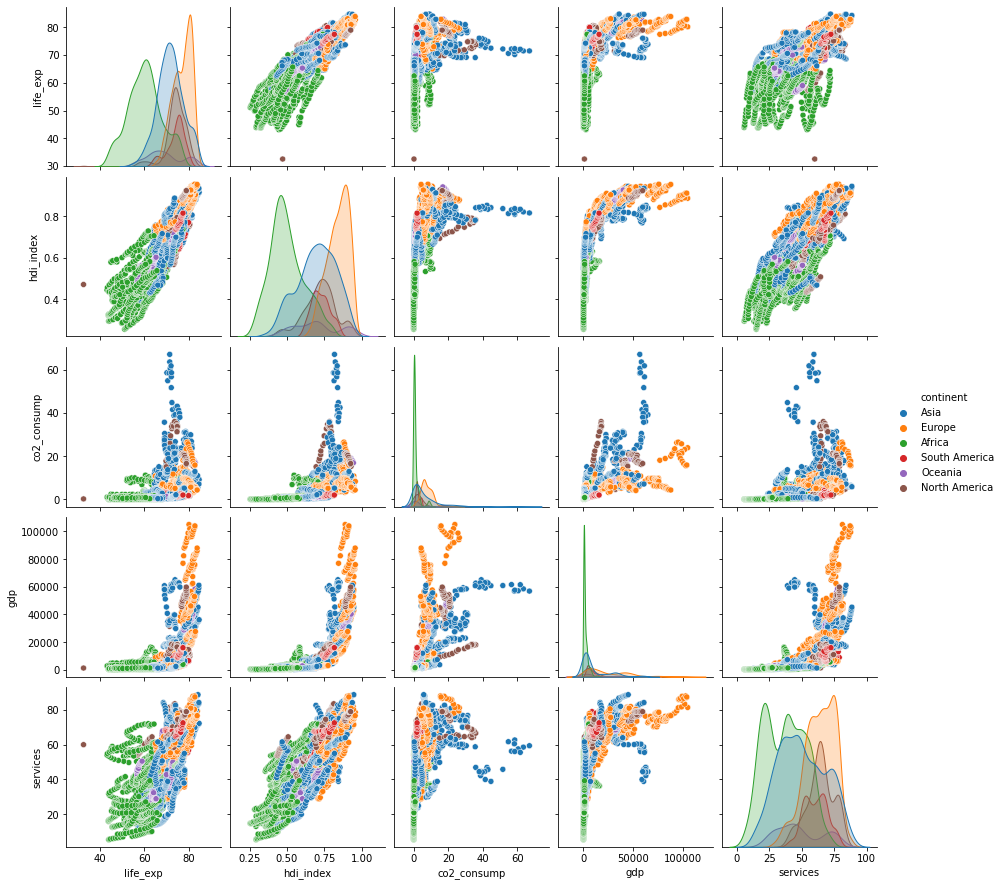

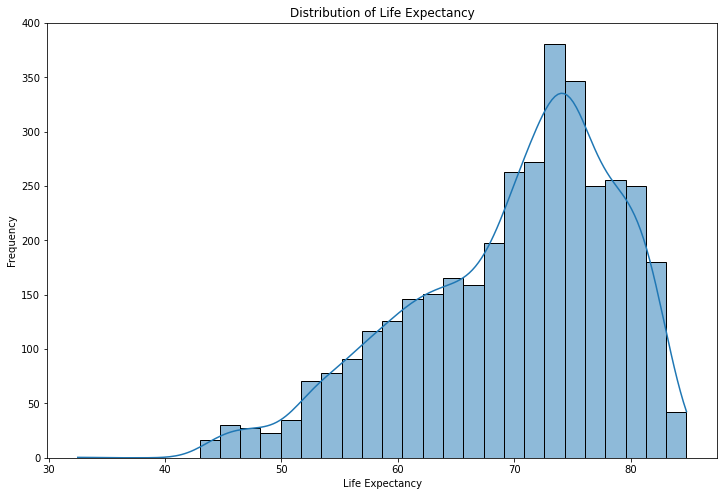

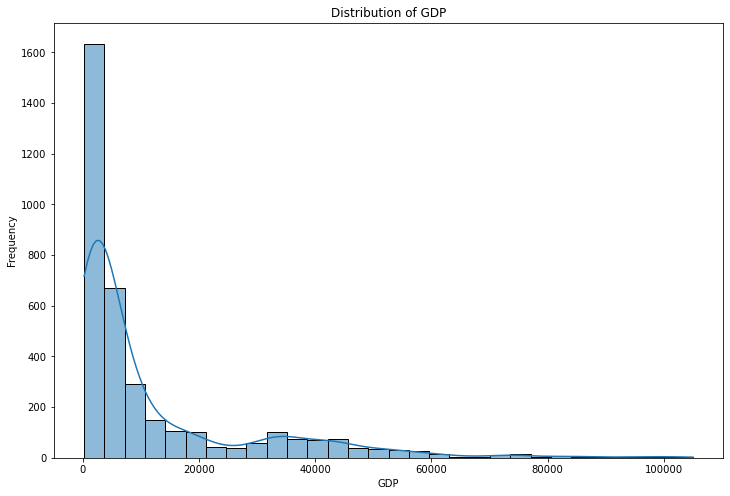

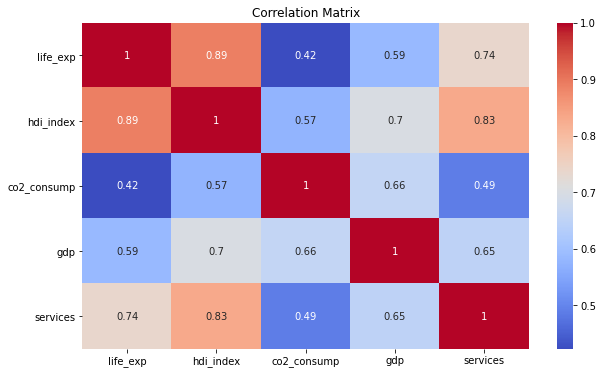

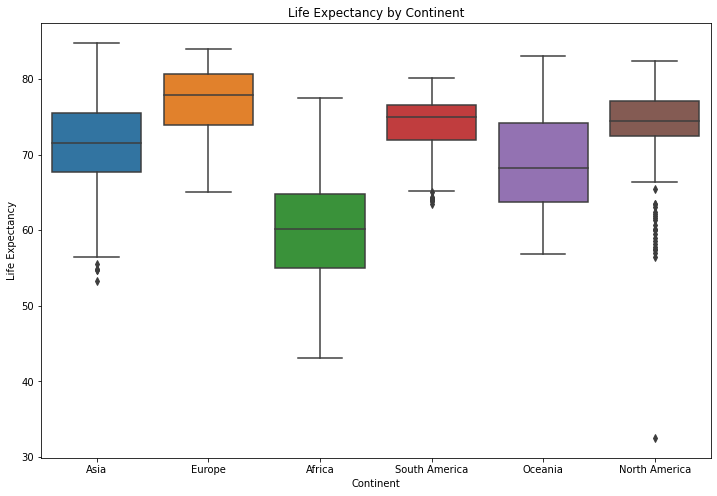


T-test for Life Expectancy between Asia and Europe: t-statistic=-21.939952069243912, p-value=9.101947558626215e-95

Chi-squared Test for Association between Continent and HDI Group: chi2=2019.6961615988357, p-value=0.0

Simple Linear Regression Model (Predicting life_exp from gdp):
                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1851.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:22:57   Log-Likelihood:                -11974.
No. Observations:                3532   AIC:                         2.395e+04
Df Residuals:                    3530   BIC:                         2.397e+04
Df Model:                           1                                         
Covar

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.decomposition import FactorAnalysis

# Load Gapminder data
data = pd.read_csv("C:\\SJEC\\DSV Lab\\archive\\gapminder_data_graphs.csv")  # Replace with your file path

# Check and clean column names
data.columns = data.columns.str.strip()  # Remove any leading/trailing whitespace
print("Columns in dataset:", data.columns)  # Print column names to verify

### 1. Data Exploration ###

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Visualize distributions of select numerical columns
numerical_columns = ['life_exp', 'hdi_index', 'co2_consump', 'gdp', 'services']

# Check if the 'continent' column is available
if 'continent' in data.columns:
    # Pairplot with continent as hue
    sns.pairplot(data[numerical_columns + ['continent']], hue='continent')
else:
    # Pairplot without hue if continent is missing
    sns.pairplot(data[numerical_columns])
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['life_exp'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['gdp'], kde=True, bins=30)
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Explore anomalies with box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='life_exp', data=data)
plt.title('Life Expectancy by Continent')
plt.ylabel('Life Expectancy')
plt.xlabel('Continent')
plt.show()

### 2. Hypothesis Testing ###

# Example: T-test for life expectancy between two continents (Asia and Europe) if continent column is present
if 'continent' in data.columns:
    asia_life_exp = data[data['continent'] == 'Asia']['life_exp']
    europe_life_exp = data[data['continent'] == 'Europe']['life_exp']
    t_stat, p_value = stats.ttest_ind(asia_life_exp, europe_life_exp)
    print(f"\nT-test for Life Expectancy between Asia and Europe: t-statistic={t_stat}, p-value={p_value}")

# Chi-squared test for categorical association between continents and HDI index groups
if 'continent' in data.columns and 'hdi_index' in data.columns:
    data['hdi_group'] = pd.cut(data['hdi_index'], bins=[0, 0.5, 0.7, 1.0], labels=['Low', 'Medium', 'High'])
    contingency_table = pd.crosstab(data['continent'], data['hdi_group'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    print(f"\nChi-squared Test for Association between Continent and HDI Group: chi2={chi2}, p-value={p}")

### 3. Regression Analysis ###

# Handle missing or infinite values in predictor variables
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf values with NaN
data = data.dropna(subset=['gdp', 'life_exp', 'hdi_index', 'co2_consump', 'services'])  # Drop rows with NaN in predictors

# Simple linear regression: Predicting life expectancy using GDP
X = data['gdp']
Y = data['life_exp']
X = sm.add_constant(X)  # Adds constant term to predictor

model = sm.OLS(Y, X).fit()
print("\nSimple Linear Regression Model (Predicting life_exp from gdp):")
print(model.summary())

# Multiple regression: Using GDP, HDI index, CO2 consumption, and services to predict life expectancy
X_multi = data[['gdp', 'hdi_index', 'co2_consump', 'services']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(data['life_exp'], X_multi).fit()
print("\nMultiple Regression Model:")
print(model_multi.summary())

### 4. Factor Analysis ###

# Factor analysis on selected features (hdi_index, co2_consump, gdp, and services)
features = data[['hdi_index', 'co2_consump', 'gdp', 'services']]
fa = FactorAnalysis(n_components=2)
factors = fa.fit_transform(features)
print("\nFactor Loadings:")
print(fa.components_)

#Statistical Analysis
# Simple Linear Regression: Predicting life expectancy from GDP
X = data['gdp']
Y = data['life_exp']
X = sm.add_constant(X)  # Adds constant term to predictor

model = sm.OLS(Y, X).fit()
print("\nSimple Linear Regression Model (Predicting life_exp from gdp):")
print(model.summary())

# Multiple Linear Regression
X_multi = data[['gdp', 'hdi_index', 'co2_consump', 'services']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(data['life_exp'], X_multi).fit()
print("\nMultiple Regression Model:")
print(model_multi.summary())

#Documentation: Summarizing Findings
print("\nSummary of Findings:")
print("1. Life expectancy shows a positive correlation with GDP, HDI index, and services.")
print("2. The distribution of life expectancy is right-skewed, indicating that a majority of countries have lower life expectancies.")
print("3. Significant anomalies were found in life expectancy across continents, with some continents exhibiting higher averages.")
print("4. The models indicate that GDP is a significant predictor of life expectancy, with an R-squared value showing a substantial amount of variance explained.")
print("5. Recommendations: Focus on improving GDP, health services, and HDI in countries with lower life expectancy to enhance overall health outcomes.")
print("1. Life expectancy shows a positive correlation with GDP (r = {:.2f}), HDI index (r = {:.2f}), and services (r = {:.2f}).".format(
    correlation_matrix.loc['life_exp', 'gdp'], 
    correlation_matrix.loc['life_exp', 'hdi_index'], 
    correlation_matrix.loc['life_exp', 'services']))
print("2. The distribution of life expectancy is right-skewed, indicating that a majority of countries have lower life expectancies, with a mean of {:.2f} and a median of {:.2f}.".format(
    data['life_exp'].mean(), 
    data['life_exp'].median()))
print("3. Significant anomalies were found in life expectancy across continents, particularly in Africa, where some countries exhibit much lower life expectancies compared to others.")
print("4. The Simple Linear Regression model indicates that GDP is a significant predictor of life expectancy (p < 0.05), with an R-squared value of {:.2f}, suggesting that {:.2f}% of the variance in life expectancy can be explained by GDP.".format(
    model.rsquared, model.rsquared * 100))
print("5. The Multiple Regression model further strengthens this finding, indicating that GDP, HDI, CO2 consumption, and services together explain {:.2f}% of the variance in life expectancy.".format(
    model_multi.rsquared * 100))
print("6. Recommendations:")
print("   - Focus on economic growth by increasing GDP, as it significantly impacts life expectancy.")
print("   - Invest in healthcare services and infrastructure, especially in regions with lower life expectancies.")
print("   - Improve educational and social services to raise the HDI, particularly in underdeveloped regions.")
print("   - Monitor and regulate CO2 consumption, as environmental health is also linked to public health outcomes.")



